### Reproduce the following graph

![alt text](co2VsYear.jpg "800,000 Years of Carbon Dioxide")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Read the file from https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2composite.txt and create a df

url = 'https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2composite.txt' 
df = pd.read_csv(url, sep="\t",comment="#", header=0, names=['Year', 'CO2_ppm', 'CO2_1s_ppm']) # Read the file and create a df
df


,Year,CO2_ppm,CO2_1s_ppm
0,-51.03,368.02,0.06
1,-48.00,361.78,0.37
2,-46.28,359.65,0.10
3,-44.41,357.11,0.16
4,-43.08,353.95,0.04
...,...,...,...
1896,803925.28,202.92,2.06
1897,804009.87,207.50,0.92
1898,804522.67,204.86,1.64
1899,805132.44,202.23,0.69


In [2]:
df.dtypes # Check the data types of the columns

Year          float64
CO2_ppm       float64
CO2_1s_ppm    float64
dtype: object

In [3]:
df.describe() # Check the summary statistics of the df

,Year,CO2_ppm,CO2_1s_ppm
count,1901.000000,1901.000000,1901.000000
mean,242810.270447,235.566691,1.340284
std,274261.195334,35.902706,0.924241
min,-51.030000,173.710000,0.010000
25%,14606.210000,204.830000,0.640000
50%,74525.650000,232.460000,1.070000
75%,504177.190000,257.930000,1.800000
max,805668.870000,368.020000,9.960000


In [4]:
df["Year"] = 1950 - df["Year"] # Convert the year to before present
df

,Year,CO2_ppm,CO2_1s_ppm
0,2001.03,368.02,0.06
1,1998.00,361.78,0.37
2,1996.28,359.65,0.10
3,1994.41,357.11,0.16
4,1993.08,353.95,0.04
...,...,...,...
1896,-801975.28,202.92,2.06
1897,-802059.87,207.50,0.92
1898,-802572.67,204.86,1.64
1899,-803182.44,202.23,0.69


In [5]:
# convert the year colum to year type

df["Year"] = pd.to_datetime(df["Year"],errors='ignore', format='%Y')
df

,Year,CO2_ppm,CO2_1s_ppm
0,2001,368.02,0.06
1,1998,361.78,0.37
2,1996,359.65,0.10
3,1994,357.11,0.16
4,1993,353.95,0.04
...,...,...,...
1896,-801975,202.92,2.06
1897,-802059,207.50,0.92
1898,-802572,204.86,1.64
1899,-803182,202.23,0.69


In [6]:
df = df[['Year', 'CO2_ppm']] # Select only the year and CO2 columns
df

,Year,CO2_ppm
0,2001,368.02
1,1998,361.78
2,1996,359.65
3,1994,357.11
4,1993,353.95
...,...,...
1896,-801975,202.92
1897,-802059,207.50
1898,-802572,204.86
1899,-803182,202.23


In [7]:
# read data from https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt and create a df3

url = 'https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt'
df3 = pd.read_csv(url, sep="\s+",comment="#", header=None, names=['Year', 'Month', 'Decimal_date','CO2_ppm', 'deseason', 'days', 'st.dev', 'unc of']) # Read the file and create a df
df3

,Year,Month,Decimal_date,CO2_ppm,deseason,days,st.dev,unc of
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
785,2023,8,2023.6250,419.68,421.57,21,0.45,0.19
786,2023,9,2023.7083,418.51,421.96,18,0.30,0.14
787,2023,10,2023.7917,418.82,422.11,27,0.47,0.17
788,2023,11,2023.8750,420.46,422.43,21,0.91,0.38


In [8]:
df3 = df3[['Year','Month', 'CO2_ppm']] # Select only the year and CO2 columns
# covert the year and month to datetime and create a new column called date
df3['Date'] = pd.to_datetime(df3[['Year', 'Month']].assign(DAY=1))
df3

/var/folders/_3/wc0yt1g957ndg1fbcvk008h40000gn/T/ipykernel_62717/2434421425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Date'] = pd.to_datetime(df3[['Year', 'Month']].assign(DAY=1))


,Year,Month,CO2_ppm,Date
0,1958,3,315.70,1958-03-01
1,1958,4,317.45,1958-04-01
2,1958,5,317.51,1958-05-01
3,1958,6,317.24,1958-06-01
4,1958,7,315.86,1958-07-01
...,...,...,...,...
785,2023,8,419.68,2023-08-01
786,2023,9,418.51,2023-09-01
787,2023,10,418.82,2023-10-01
788,2023,11,420.46,2023-11-01


In [9]:
# get rolling mean of CO2_ppm for 11 months and create a new column called rolling_mean
df3['rolling_mean'] = df3['CO2_ppm'].rolling(11).mean()
df3

/var/folders/_3/wc0yt1g957ndg1fbcvk008h40000gn/T/ipykernel_62717/817603120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['rolling_mean'] = df3['CO2_ppm'].rolling(11).mean()


,Year,Month,CO2_ppm,Date,rolling_mean
0,1958,3,315.70,1958-03-01,NaN
1,1958,4,317.45,1958-04-01,NaN
2,1958,5,317.51,1958-05-01,NaN
3,1958,6,317.24,1958-06-01,NaN
4,1958,7,315.86,1958-07-01,NaN
...,...,...,...,...,...
785,2023,8,419.68,2023-08-01,420.500909
786,2023,9,418.51,2023-09-01,420.752727
787,2023,10,418.82,2023-10-01,420.875455
788,2023,11,420.46,2023-11-01,421.009091


In [10]:
# remove the rows before 2001
df3 = df3[df3['Year'] > 2001]
df3

,Year,Month,CO2_ppm,Date,rolling_mean
526,2002,1,372.70,2002-01-01,371.461818
527,2002,2,373.37,2002-02-01,371.529091
528,2002,3,374.30,2002-03-01,371.597273
529,2002,4,375.19,2002-04-01,371.702727
530,2002,5,375.93,2002-05-01,371.932727
...,...,...,...,...,...
785,2023,8,419.68,2023-08-01,420.500909
786,2023,9,418.51,2023-09-01,420.752727
787,2023,10,418.82,2023-10-01,420.875455
788,2023,11,420.46,2023-11-01,421.009091


In [11]:
# get the mean for each year and create a new df4
df4 = df3.groupby(['Year']).mean()
df4

,Month,CO2_ppm,Date,rolling_mean
Year,,,,
2002,6.5,373.452500,2002-06-16 12:00:00,372.477197
2003,6.5,375.983333,2003-06-16 12:00:00,374.942121
2004,6.5,377.698333,2004-06-16 08:00:00,377.095985
2005,6.5,379.983333,2005-06-16 12:00:00,378.935909
2006,6.5,382.090833,2006-06-16 12:00:00,381.289091
2007,6.5,384.025000,2007-06-16 12:00:00,383.166061
2008,6.5,385.831667,2008-06-16 08:00:00,385.083258
2009,6.5,387.642500,2009-06-16 12:00:00,386.914091
2010,6.5,390.101667,2010-06-16 12:00:00,389.071288


In [12]:
# keep only the Year and rolling_mean columns and reset the index
df4 = df4[['rolling_mean']].reset_index()
df4


,Year,rolling_mean
0,2002,372.477197
1,2003,374.942121
2,2004,377.095985
3,2005,378.935909
4,2006,381.289091
5,2007,383.166061
6,2008,385.083258
7,2009,386.914091
8,2010,389.071288
9,2011,391.092045


In [13]:
# rename the columns to match the df columns
df4 = df4.rename(columns={'Year': 'Year', 'rolling_mean': 'CO2_ppm'})
df4

,Year,CO2_ppm
0,2002,372.477197
1,2003,374.942121
2,2004,377.095985
3,2005,378.935909
4,2006,381.289091
5,2007,383.166061
6,2008,385.083258
7,2009,386.914091
8,2010,389.071288
9,2011,391.092045


In [14]:
# concatenate df and df4 and sort by Year

df5 = pd.concat([df, df4]).sort_values(by=['Year'])
df5

,Year,CO2_ppm
1900,-803718,207.290000
1899,-803182,202.230000
1898,-802572,204.860000
1897,-802059,207.500000
1896,-801975,202.920000
...,...,...
17,2019,410.481591
18,2020,413.141515
19,2021,415.523409
20,2022,417.601591


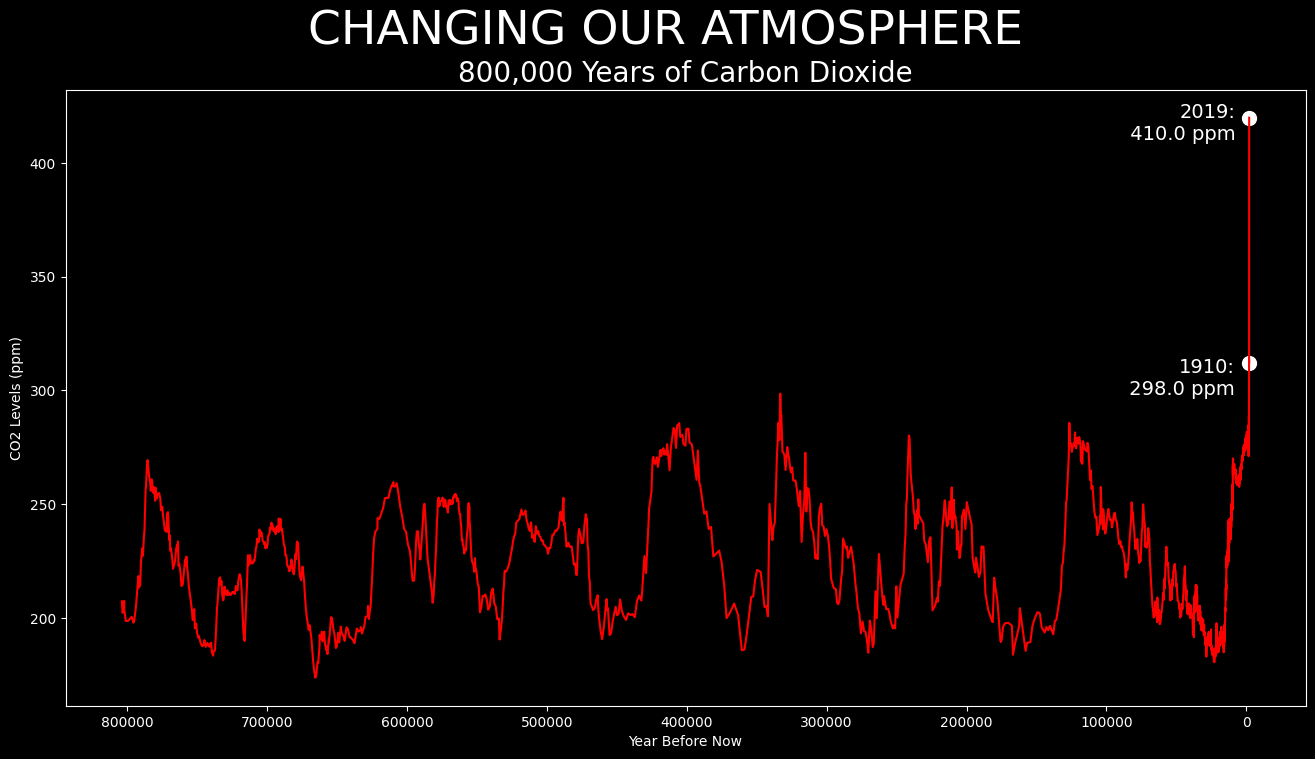

<Figure size 1600x800 with 0 Axes>

In [17]:
# plot the data
plt.style.use('dark_background')

def format_year(x, _): # convert minus years to positive
    return f'{abs(int(x))}' # absolute value

plt.plot(df5['Year'], df5['CO2_ppm'],linestyle='-', markersize=3, color='red')
plt.xlabel('Year Before Now')
plt.ylabel('CO2 Levels (ppm)')
plt.title('800,000 Years of Carbon Dioxide', fontsize=20)
plt.suptitle('CHANGING OUR ATMOSPHERE', fontsize=34)

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_year)) # gca() = get current axes, set the x axis to format_year function, which converts minus years to positive.

plt.scatter(df5[df5['Year'] == 2023]['Year'], df5[df5['Year'] == 2023]['CO2_ppm'],  color = 'white', s = 100)
plt.scatter(df5[df5['Year'] == 1950]['Year'], df5[df5['Year'] == 1950]['CO2_ppm'],  color = 'white', s = 100)

for year in [1910, 2019]:
    data_point = df5[df5['Year'] == year] # get the data point for the year
    data_point = data_point.round({'CO2_ppm': 0}) # round the CO2_ppm to 0 decimal places

    plt.annotate(f'{year}:\n {data_point["CO2_ppm"].values[0] } ppm',
                 (data_point['Year'].values[0], data_point['CO2_ppm'].values[0]),
                 textcoords="offset points", xytext=(-10,0), ha='right', fontsize=14, color='white')

plt.figure(figsize=(16,8)) # set the figure size
plt.show()


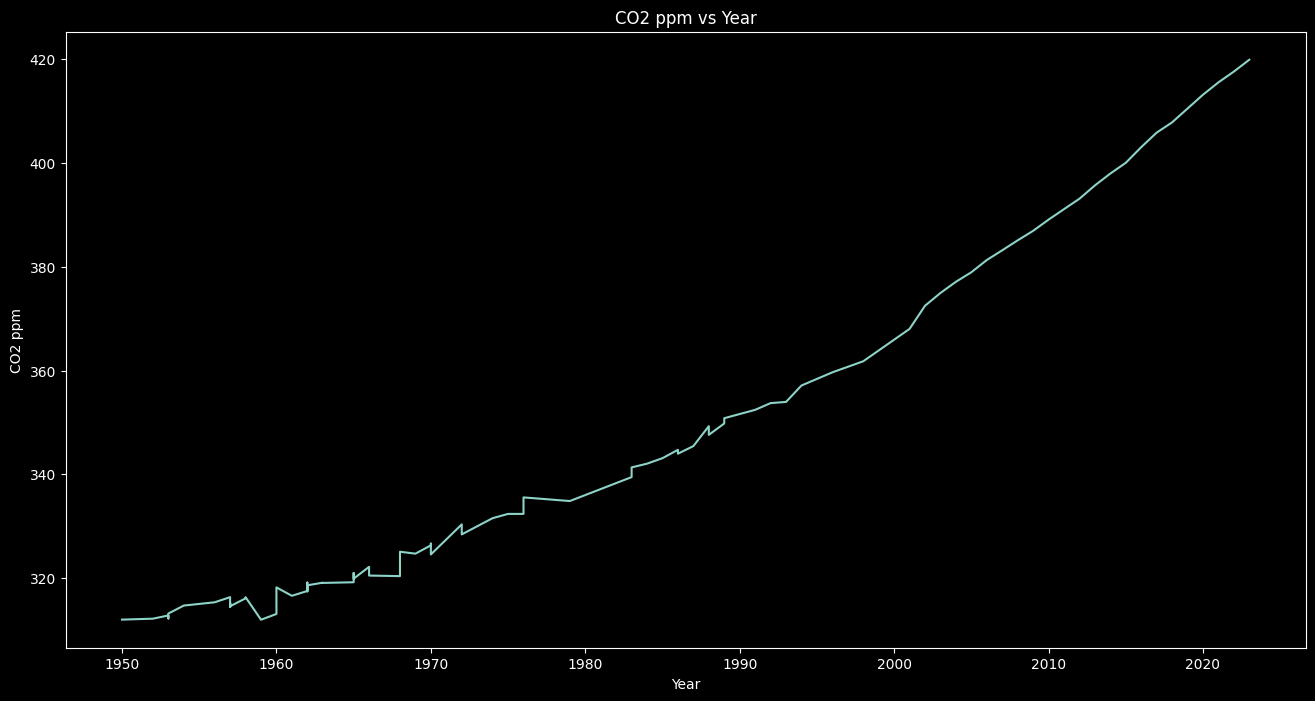

In [18]:
# plot the data from 0 to now
df6 = df5[df5['Year'] >= 1950] # select only the rows where year is greater than or equal to 0
plt.plot(df6['Year'], df6['CO2_ppm'])
# set size of the plot
plt.rcParams['figure.figsize'] = [16, 8]
plt.xlabel('Year')
plt.ylabel('CO2 ppm')
plt.title('CO2 ppm vs Year')
plt.show()